In [5]:
import IPython
import typing
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.animation
%matplotlib inline


Mějme jednoduchou parabolickou funkci funkci.
$f(x) = 2·x^2 + 4·x + 5$

<img src="./picture_gradientDescent_01.PNG" alt="parabola"  width="300"  height="200"> 

Její 1. derivace je:

$\frac {d'f(x)}{dx} = 4·x + 4$

Její 2. derivace je:

$\frac {d''f(x)}{dx} = 4$




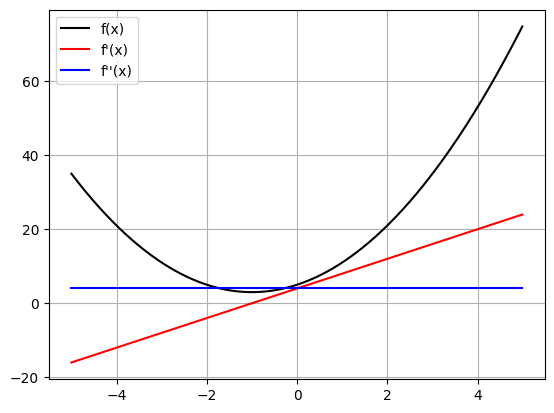

In [6]:
f: typing.Callable[[float], float]      = lambda xi: (2*xi**2) + (4*xi**1) + (5*xi**0)
df: typing.Callable[[float], float]     = lambda xi: (4*xi**1) + (4*xi**0)
ddf: typing.Callable[[float], float]    = lambda xi: (4*xi**0)

xRange: typing.Sequence[float]      = [0.01*_ for _ in range(-500, 500)]
yRange: typing.Sequence[float]      = [f(_) for _ in xRange]
dRange: typing.Sequence[float]      = [df(_) for _ in xRange]
ddRange:typing.Sequence[float]      = [ddf(_) for _ in xRange]

plt.plot(xRange, yRange, color="black", label="f(x)")
plt.plot(xRange, dRange, color="red", label="f'(x)")
plt.plot(xRange, ddRange, color="blue", label="f''(x)")
plt.grid()
plt.legend()
plt.show()

Metoda gradientního sestupu vychází z následujícího vzorečku: \
$x_{new} = x_{old} - \gamma·\nabla{f(x_{old})}$ \
$\gamma$ ... učící koeficient (metoda je na něm dosti citlivá, pokud je příliš nízký, k výsledku budeme konvergovat věčnost, příliš vysoký může způsobit efekt pingpongu).


Metoda říká, že vezmu hodnotu nezávislé proměnné, přičtu k ní hodnotu derivace funkce v ní (sjedu po gradientu) sníženou o podrelaxační faktor (učící koeficient).\
Pak už jedu iterativně s tím, že zvolím vhodný počáteční stav $x_0$.


In [7]:
import matplotlib.pyplot


colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
def gradientDescent(
    dfx: typing.Callable[[float], float],
    x0: float,
    learningCoeff: typing.Optional[float] = 1e-3,
    maxIterations: typing.Optional[int] = 1000,
    residualTarget: typing.Optional[float]= 1e-6,
    plotting: typing.Optional[bool] = False,
    plotFreq: typing.Optional[int] = 100) -> float:
    
    currIter: int = 0
    condition1: typing.Callable[[None], bool] = lambda: currIter < maxIterations
    condition2: typing.Callable[[None], bool] = lambda: abs(df(x0)) > residualTarget
    conditions: typing.Callable[[None], bool] = lambda: condition1() and condition2()
    
    if plotting:
        artists: list = []
        fig: Figure
        ax: Axes
        fig, ax = plt.subplots()
        
        ax.plot(xRange, yRange, color="black", label="f(x)")
        ax.plot(xRange, dRange, color="red", label="f'(x)")
        ax.plot(xRange, ddRange, color="blue", label="f''(x)")
        ax.grid()
        ax.legend()
    
    markerSize:int = 50
    while conditions():
        x_new: int = x0 - learningCoeff * df(x0)
        
        if plotting:
            if currIter % plotFreq == 0:
                artists.append(ax.scatter([x_new], f(x_new), s=markerSize, c="green", marker="x"))
                markerSize += 1
        currIter += 1
        x0 = x_new
    
    if plotting:
        ani = matplotlib.animation.ArtistAnimation(fig=fig, artists=artists)
        plt.show()
        print(ani)
    print(f"Gradient descent iterations: {currIter}")
    
    return x0

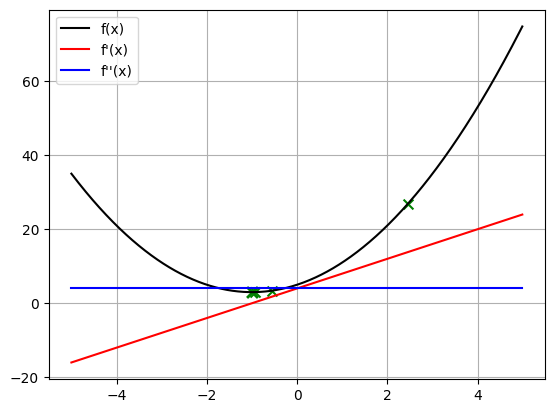

Gradient descent iterations: 404
Root: -0.9999997523258684


c:\Users\tomas.prejda\Python\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [8]:
plotting: bool = True
initialGuess: float = 2.6
resultRoot: float = gradientDescent(dfx=df, x0= initialGuess, learningCoeff=0.01, plotting=plotting, maxIterations=1000, plotFreq=50)
print(f"Root: {resultRoot}")

Problém metody je možnost ping-pongu a to jak dlouho hledání minima může trvat.\
Dalším problémem je případ, kde je několik minim -> je to velmi citlivé na počáteční bod a učící koeficient \
\
Pokud je na křivce místo, které je velmi ploché (nízký gradient), potřebujeme velký učící koeficient, nebo to trvá věčně. \
Pokud je ale na křivce velmi strmé místo, velký koeficient snadno metodu zdiverguje.